# Extract and plot data of Time-series section (Basic variables and indices)
* This program is used to read the variables in Time-series section of the OCDP data portal, for example:
   - [Province](http://lamps.math.yorku.ca/OntarioClimate/index_app_timeseries.htm#/TmAnnualTime)
   - [Regions](http://lamps.math.yorku.ca/OntarioClimate/index_app_timeseries.htm#/SubregionTmAnnualTime)
   - [Municipalites](http://lamps.math.yorku.ca/OntarioClimate/index_app_timeseries.htm#/MunicipalTmAnnualTime)
* To run this program, it is neccesary to install: 
   - pandas;
   - numpy;
   - matplotlib and 
   - geopandas
---
*Programmer: Dr. Ziwang Deng, LAMPS, Department of Mathematics & Statistics, York University*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon
from geopandas import GeoSeries

## Part I: Proveincial Averages

In [2]:
varNames=['CDD','Cold_day','Cold_night','DTR','FD','GSL','HDD','Hot_day','Hot_night','HWDI_days','HWDI_period',
          'HWDI_strength','ID','GS_StartDay','GS_EndDay','pr95pDays','pr95pTOT','pr99pDays','pr99pTOT',
          'prCDD','PRCPTOT','prCWD','R1mm','R5mm','R10mm','R20mm','R25mm','RX1day','RX5day','SDII','SU',
          'tnCSDI','TNn','TNx','TR','TXn','txWSDI','TXx','Tm','Tx','Tn','Pr']
# 38 indices + 4 basic variables

In [3]:
# user just needs to select one variable name from varNames
#----------------------------------------------------------------------------------------------------------------------------
varName='CDD'
#----------------------------------------------------------------------------------------------------------------------------


varFileName = '../data/timeseries/' + varName + '_8964Pts_RegionMean_Diff_20YMean_Ann.csv'
varData = pd.read_csv(varFileName, header = None)
print(varData.head(3))

valRCPs =varData.iloc[:,[1,4,7,10]]
print(valRCPs.head(3))
vals=np.array(valRCPs)

     0     1     2     3     4     5     6     7     8     9     10    11
0 -45.6   7.1  66.2 -42.3   6.9  55.0 -38.1   8.0  85.6 -41.0   6.7  59.7
1 -54.6  -4.0  73.0 -51.6   0.5  27.7 -54.6 -10.0  74.6 -50.1   1.8  50.5
2 -63.1 -31.1  35.8 -63.0 -34.5  34.8 -62.4 -31.6  26.5 -60.3 -30.4  34.7
     1     4     7     10
0   7.1   6.9   8.0   6.7
1  -4.0   0.5 -10.0   1.8
2 -31.1 -34.5 -31.6 -30.4


Text(0.5, 1.0, 'Provincial averaged change of CDD under the four RCPs')

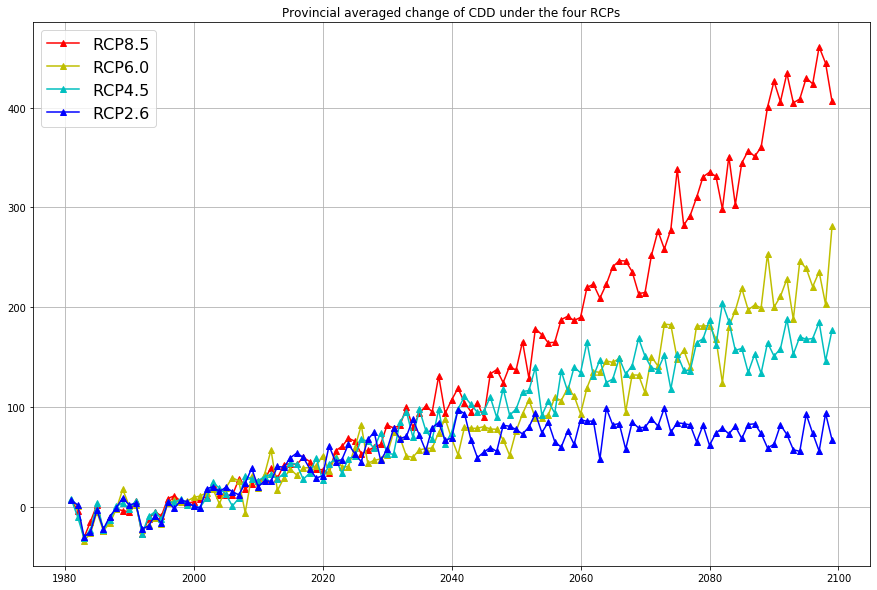

In [4]:
years=np.arange(1981,2100,1)
fig2 = plt.figure(figsize=(15,10))
plt.plot(years, vals[:,0], 'r-^', label = 'RCP8.5')
plt.plot(years, vals[:,1], 'y-^', label = 'RCP6.0')
plt.plot(years, vals[:,2], 'c-^', label = 'RCP4.5') 
plt.plot(years, vals[:,3], 'b-^', label = 'RCP2.6')
plt.legend(loc='upper left', prop={'size': 16})
plt.grid()
plt.title('Provincial averaged change of ' + varName + ' under the four RCPs')

## Part II: the 50 regions

(102, 2)


0       Annotation(-89.0255, 52.9401, '1')
1        Annotation(-82.473, 50.2706, '2')
2        Annotation(-92.4652, 48.706, '3')
3       Annotation(-88.4082, 49.7619, '4')
4       Annotation(-80.3593, 47.7994, '5')
                      ...                 
97     Annotation(-80.1764, 42.8578, '46')
98     Annotation(-81.2205, 42.7213, '47')
99     Annotation(-82.1248, 42.4239, '48')
100    Annotation(-82.1158, 42.8739, '49')
101     Annotation(-82.7759, 42.165, '50')
Length: 102, dtype: object

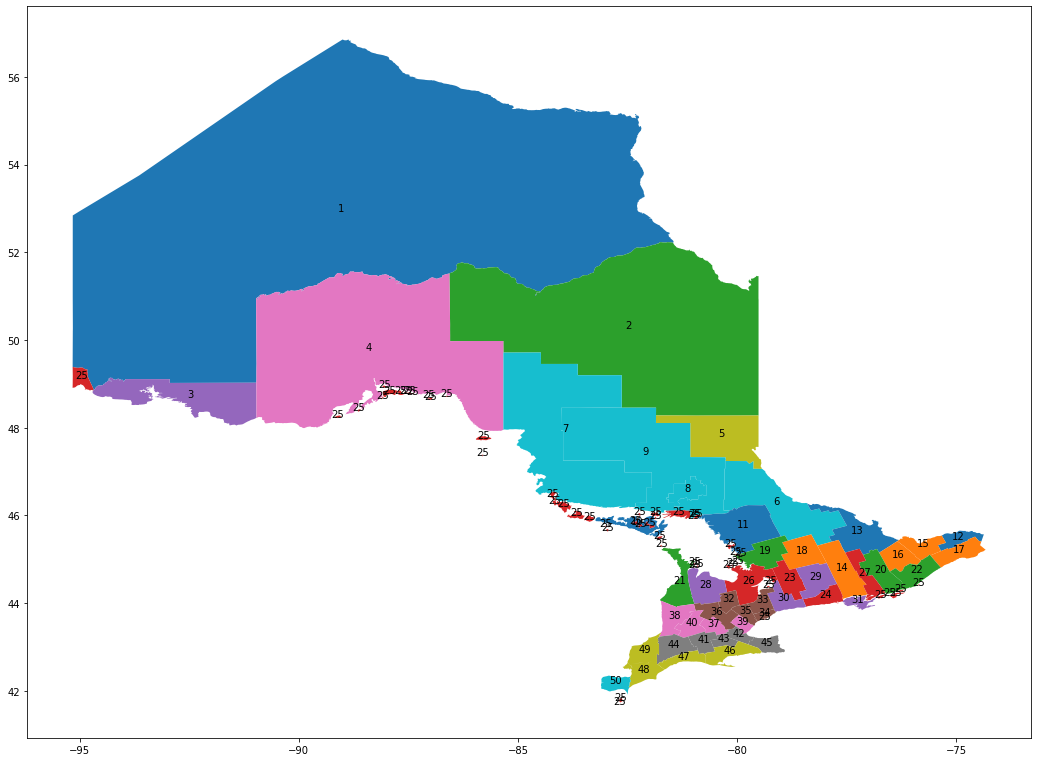

In [5]:
regionsfn = '../shapefiles/Municipal_Polygon.geojson'
# cmp='jet'
region=gpd.read_file(regionsfn)
# print('region.head(1):')
# print(region[{'ID','name'}])
regionNames=region[{'ID','name'}]
print(regionNames.shape)
ax=region.plot(column='ID',figsize=(18,27))
region.apply(lambda x: ax.annotate(s=x['ID'], xy=x.geometry.centroid.coords[0], ha='center'),axis=1)
# region.apply(lambda x: ax.annotate(s=x['name'], xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

In [6]:
varNames=['CDD','Cold_day','Cold_night','DTR','FD','GSL','HDD','Hot_day','Hot_night','HWDI_days','HWDI_period',
          'HWDI_strength','ID','GS_StartDay','GS_EndDay','pr95pDays','pr95pTOT','pr99pDays','pr99pTOT',
          'prCDD','PRCPTOT','prCWD','R1mm','R5mm','R10mm','R20mm','R25mm','RX1day','RX5day','SDII','SU',
          'tnCSDI','TNn','TNx','TR','TXn','txWSDI','TXx','Tm','Tx','Tn','Pr']
# 38 indices + 4 basic variables

print(np.size(varNames)) 
regionNames = pd.read_csv('../data/timeseries/Ontario_50RegionsNames.csv')
print(regionNames.head(3))
# the data in the data table is aranged from north to sourth(as shown in the map), i.e., from Kenora  to ESSEX
# the first row of data belong to the 7th region, because the names are sortted according to ABC..

42
   sortedID  dataID    NAME
0         1       7  ALGOMA
1         2      43   BRANT
2         3      21   BRUCE


In [7]:
# followng code to specify index name and region name

43
299


Text(0.5, 1.0, 'Projected decadal change of CDD under the four RCPs over BRANT (reference value:299)')

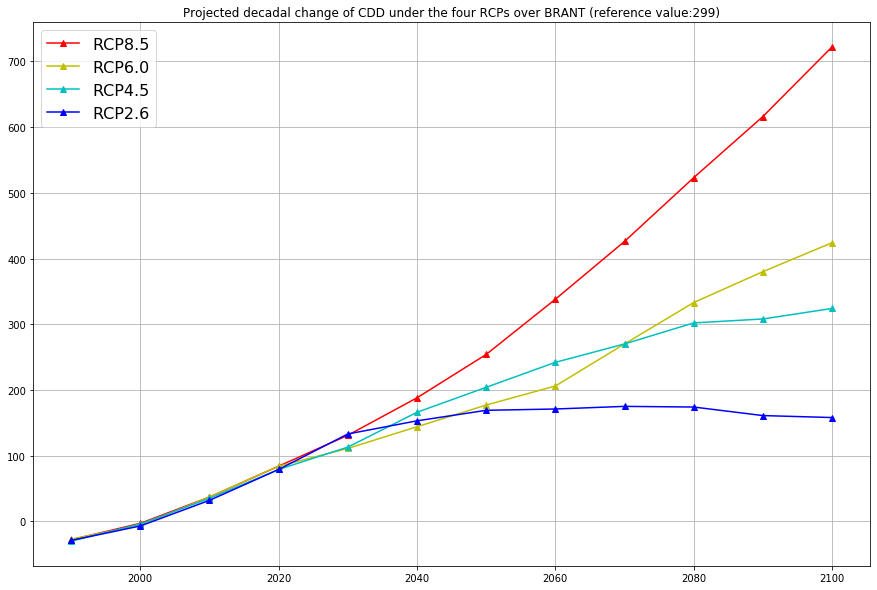

In [8]:
#-----------------------------------------------------------------------------------------------------------------------------
# user just needs change the varName and regionName

# varName='Tm' # as an example, we select temperature
regionName = 'BRANT' # as an example, we select BRANT, remember use the capital charctors

#-----------------------------------------------------------------------------------------------------------------------------




# read data
datafilename = '../data/timeseries/' + varName + '_50Regions_RCPs_EnsembleMean_change.csv'
data = pd.read_csv(datafilename,header=None)
# the header is ['ref', 1990s,2000s,...,2100s]

# extract the id of the data of selected region in the data table
theID=int(regionNames[regionNames.NAME == regionName].dataID)
print(theID)

# define the decades, 1990s, 2000s,...,2100s
decades=np.arange(1990,2110,10)

# extract data for plotting
allIDs=[theID-1,theID-1+50,theID-1+50*2,theID-1+50*3]

# extract changes ignore the reference value 
var = np.array(data.iloc[allIDs,1:])

refval = str(data.iloc[theID-1,0])
print(refval)

fig2 = plt.figure(figsize=(15,10))
plt.plot(decades, var[0,:], 'r-^', label = 'RCP8.5')
plt.plot(decades, var[1,:], 'y-^', label = 'RCP6.0')
plt.plot(decades, var[2,:], 'c-^', label = 'RCP4.5') 
plt.plot(decades, var[3,:], 'b-^', label = 'RCP2.6')
plt.legend(loc='upper left', prop={'size': 16})
plt.grid()
plt.title('Projected decadal change of ' + varName + ' under the four RCPs over ' + regionName + ' (reference value:' + refval +')')

## Part III: the 150 municipals   

   ID           Station_Na  Latitude Longitude Elevation       Lat       Lon  \
0   1  ALBION_FIELD_CENTRE  43°55' N  79°50' W     282 m  43.91667 -79.83333   
1   2      ALLISTON_NELSON  44°09' N  79°52' W     221 m  44.15000 -79.86667   

                     geometry  
0  POINT (-79.83333 43.91667)  
1     POINT (-79.86667 44.15)  


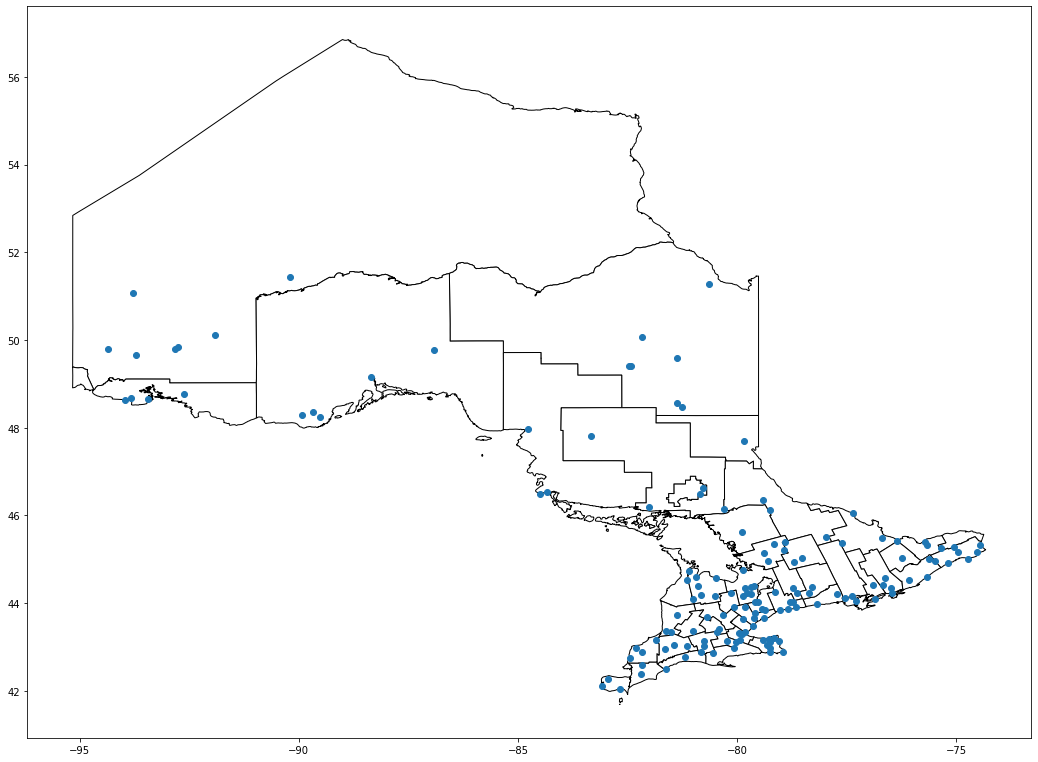

In [9]:
# locations of the cities

basicVars = ['tas','tasmax','tasmin','pr']
fnTail = '_150stations_RCP60_EnsembleMean_change.csv'
cityLocationFn = '../shapefiles/Stations151.geojson'
cityLocation = gpd.read_file(cityLocationFn)
print(cityLocation.head(2))


ax=region.plot(color='white', edgecolor='black', figsize=(18,27))
citys = cityLocation.plot(ax=ax)

In [10]:
# read data
# the header is ['ref', 1990s,2000s,...,2100s]

tasRCP26 = pd.read_csv('../data/timeseries/tas_150stations_RCP26_EnsembleMean_change.csv',header=None)
print(tasRCP26.head(3))
tasRCP45 = pd.read_csv('../data/timeseries/tas_150stations_RCP45_EnsembleMean_change.csv',header=None)
tasRCP60 = pd.read_csv('../data/timeseries/tas_150stations_RCP60_EnsembleMean_change.csv',header=None)
tasRCP85 = pd.read_csv('../data/timeseries/tas_150stations_RCP85_EnsembleMean_change.csv',header=None)

tasmaxRCP26 = pd.read_csv('../data/timeseries/tasmax_150stations_RCP26_EnsembleMean_change.csv',header=None)
tasmaxRCP45 = pd.read_csv('../data/timeseries/tasmax_150stations_RCP45_EnsembleMean_change.csv',header=None)
tasmaxRCP60 = pd.read_csv('../data/timeseries/tasmax_150stations_RCP60_EnsembleMean_change.csv',header=None)
tasmaxRCP85 = pd.read_csv('../data/timeseries/tasmax_150stations_RCP85_EnsembleMean_change.csv',header=None)

tasminRCP26 = pd.read_csv('../data/timeseries/tasmin_150stations_RCP26_EnsembleMean_change.csv',header=None)
tasminRCP45 = pd.read_csv('../data/timeseries/tasmin_150stations_RCP45_EnsembleMean_change.csv',header=None)
tasminRCP60 = pd.read_csv('../data/timeseries/tasmin_150stations_RCP60_EnsembleMean_change.csv',header=None)
tasminRCP85 = pd.read_csv('../data/timeseries/tasmin_150stations_RCP85_EnsembleMean_change.csv',header=None)

prRCP26 = pd.read_csv('../data/timeseries/pr_150stations_RCP26_EnsembleMean_change.csv',header=None)
prRCP45 = pd.read_csv('../data/timeseries/pr_150stations_RCP45_EnsembleMean_change.csv',header=None)
prRCP60 = pd.read_csv('../data/timeseries/pr_150stations_RCP60_EnsembleMean_change.csv',header=None)
prRCP85 = pd.read_csv('../data/timeseries/pr_150stations_RCP85_EnsembleMean_change.csv',header=None)


cityNames = pd.read_excel('../data/timeseries/Ontarior150andAjax_Stationname2.xlsx')
print(cityNames['Station Name'].head(3))

     0    1   2    3    4    5    6    7    8    9    10   11   12
0   7.0 -0.4   0  0.3  0.9  1.3  1.6  1.9  1.9  1.9  1.9  1.8  1.7
1   7.8 -0.4   0  0.3  0.9  1.3  1.6  1.9  1.9  1.9  1.9  1.8  1.7
2  10.0 -0.4   0  0.3  0.8  1.2  1.5  1.7  1.7  1.7  1.7  1.6  1.6
0    ALBION_FIELD_CENTRE
1        ALLISTON_NELSON
2            AMHERSTBURG
Name: Station Name, dtype: object


5    BARRIE_WPCC
Name: Station Name, dtype: object
[[ 7.  -0.4  0.   0.3  0.9  1.3  1.6  1.9  1.9  1.9  1.9  1.8  1.7]]


Text(0.5, 1.0, 'Change of precipitation at city: BARRIE_WPCC (ref:930mm)')

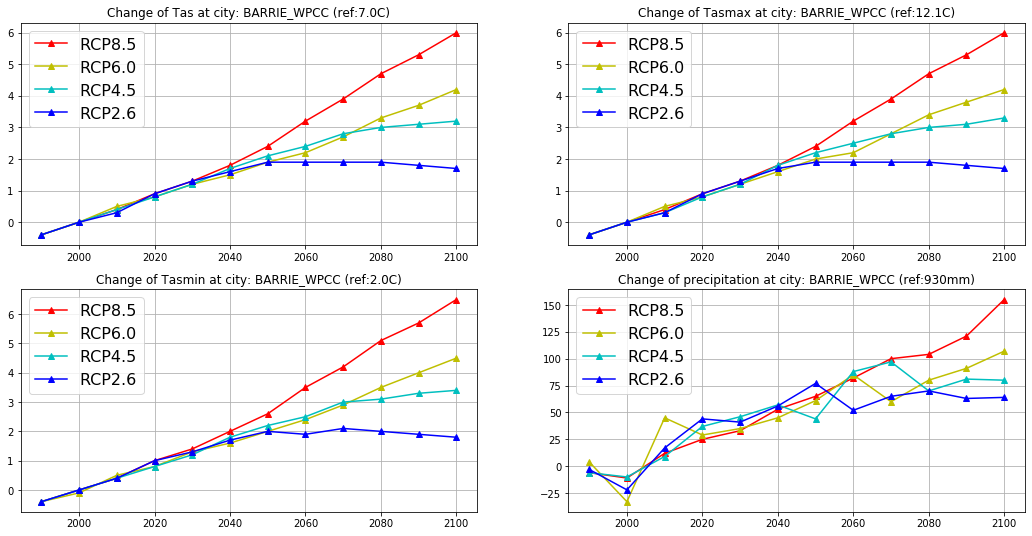

In [11]:
#  plotting
#  user just needs change the cityName
# --------------------------------------------------------------------------------------------------------------------------
cityName='BARRIE_WPCC'

#---------------------------------------------------------------------------------------------------------------------------






cityID = cityNames.loc[cityNames['Station Name']==cityName].index
print(cityNames['Station Name'].iloc[cityID])

tm26=np.array(tasRCP26.iloc[cityID,0:])
tm45=np.array(tasRCP45.iloc[cityID,0:])
tm60=np.array(tasRCP60.iloc[cityID,0:])
tm85=np.array(tasRCP85.iloc[cityID,0:])

tx26=np.array(tasmaxRCP26.iloc[cityID,0:])
tx45=np.array(tasmaxRCP45.iloc[cityID,0:])
tx60=np.array(tasmaxRCP60.iloc[cityID,0:])
tx85=np.array(tasmaxRCP85.iloc[cityID,0:])

tn26=np.array(tasminRCP26.iloc[cityID,0:])
tn45=np.array(tasminRCP45.iloc[cityID,0:])
tn60=np.array(tasminRCP60.iloc[cityID,0:])
tn85=np.array(tasminRCP85.iloc[cityID,0:])

pr26=np.array(prRCP26.iloc[cityID,0:])
pr45=np.array(prRCP45.iloc[cityID,0:])
pr60=np.array(prRCP60.iloc[cityID,0:])
pr85=np.array(prRCP85.iloc[cityID,0:])



print(tm26)

fig_basicvar = plt.figure(figsize=(18,9))
plt.subplot(221)

plt.plot(decades, tm85[0,1:], 'r-^', label = 'RCP8.5')
plt.plot(decades, tm60[0,1:], 'y-^', label = 'RCP6.0')
plt.plot(decades, tm45[0,1:], 'c-^', label = 'RCP4.5') 
plt.plot(decades, tm26[0,1:], 'b-^', label = 'RCP2.6')
plt.legend(loc='upper left', prop={'size': 16})
plt.grid()
plt.title('Change of Tas at city: ' + cityName + ' (ref:' + str(tm85[0,0]) +'C)')

plt.subplot(222)

plt.plot(decades, tx85[0,1:], 'r-^', label = 'RCP8.5')
plt.plot(decades, tx60[0,1:], 'y-^', label = 'RCP6.0')
plt.plot(decades, tx45[0,1:], 'c-^', label = 'RCP4.5') 
plt.plot(decades, tx26[0,1:], 'b-^', label = 'RCP2.6')
plt.legend(loc='upper left', prop={'size': 16})
plt.grid()
plt.title('Change of Tasmax at city: ' + cityName + ' (ref:' + str(tx85[0,0]) +'C)')

plt.subplot(223)

plt.plot(decades, tn85[0,1:], 'r-^', label = 'RCP8.5')
plt.plot(decades, tn60[0,1:], 'y-^', label = 'RCP6.0')
plt.plot(decades, tn45[0,1:], 'c-^', label = 'RCP4.5') 
plt.plot(decades, tn26[0,1:], 'b-^', label = 'RCP2.6')
plt.legend(loc='upper left', prop={'size': 16})
plt.grid()
plt.title('Change of Tasmin at city: ' + cityName + ' (ref:' + str(tn85[0,0]) +'C)')


plt.subplot(224)

plt.plot(decades, pr85[0,1:], 'r-^', label = 'RCP8.5')
plt.plot(decades, pr60[0,1:], 'y-^', label = 'RCP6.0')
plt.plot(decades, pr45[0,1:], 'c-^', label = 'RCP4.5') 
plt.plot(decades, pr26[0,1:], 'b-^', label = 'RCP2.6')
plt.legend(loc='upper left', prop={'size': 16})
plt.grid()
plt.title('Change of precipitation at city: ' + cityName + ' (ref:' + str(pr85[0,0]) +'mm)')